In [116]:
##data_science homework


In [117]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Load Data

In [79]:
# Load Data
df = pd.read_csv('Data_science_Task.csv')
#Dataframe dimension
print(df.shape)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head(5)

(333533, 8)


,customer_code,order_code,checkout_date,delivery_date,item_code,category_code,category_name
0,115,3664495,2020-06-28 23:57:58.843,2020-06-29 18:20:36.373,76159,112.0,پنیر پیتزا و سایر پنیرها
1,115,3664495,2020-06-28 23:57:58.843,2020-06-29 18:20:36.373,23215,73.0,ماءالشعیر
2,115,3664495,2020-06-28 23:57:58.843,2020-06-29 18:20:36.373,83032,400.0,چیپس، پفک، اسنک و پاپ‌کرن
3,115,3664495,2020-06-28 23:57:58.843,2020-06-29 18:20:36.373,25477,217.0,کره
4,115,3664495,2020-06-28 23:57:58.843,2020-06-29 18:20:36.373,51061,229.0,نوار بهداشتی


In [4]:
# unique counts
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)

In [5]:
unique_counts(df)


customer_code :  6072
order_code :  28689
checkout_date :  28689
delivery_date :  20302
item_code :  11610
category_code :  149
category_name :  149


"d1 =int(date(df['delivery_date'].max())) \ndelta =int(d1-d0)\nprint(delta.days)"

In [91]:
#duration
from datetime import date
d0 = (df['checkout_date'].min())
print("min_checkout_date",d0,end="\n")
d1 = (df['checkout_date'].max())
print("max_checkout_date",d1,end="\n")
d2 = (df['delivery_date'].min())
print("delivery_date_min",d2,end="\n")
d3 = (df['delivery_date'].max())
print("delivery_date_min",d3,end="\n")

min_checkout_date 2020-01-01 00:04:27.099
max_checkout_date 2020-06-28 23:57:58.843
delivery_date_min 2020-01-01 12:14:08.653
delivery_date_min 2020-06-29 20:02:29.687


In [7]:
df.isnull().sum()

customer_code      0
order_code         0
checkout_date      0
delivery_date      0
item_code          0
category_code    141
category_name    141
dtype: int64

In [8]:
df = df[df.category_code.notnull()]

In [9]:
df.isnull().sum()

customer_code    0
order_code       0
checkout_date    0
delivery_date    0
item_code        0
category_code    0
category_name    0
dtype: int64

In [10]:
df.to_csv('cleaned_Data_science.csv')#, index=None

In [113]:
# Aggregate product data
check_data = df.groupby('checkout_date').checkout_date.agg( total= 'count'
                                                     )

# Display product data for first 5 customers
check_data.head()



,total
checkout_date,
2020-01-01 00:04:27.099,3
2020-01-01 00:05:51.919,14
2020-01-01 00:23:14.093,9
2020-01-01 00:43:30.141,10
2020-01-01 02:28:41.580,31


In [115]:
check_data['total'].max()


146

In [121]:
check_data['total'].min()

1

In [118]:
delivery_date = df.groupby('delivery_date').delivery_date.agg( total= 'count'
                                                     )

# Display product data for first 5 customers
delivery_date.head()

,total
delivery_date,
2020-01-01 12:14:08.653,12
2020-01-01 13:43:55.183,1
2020-01-01 13:45:30.813,19
2020-01-01 14:01:53.406,31
2020-01-01 14:51:28.348,33


In [129]:
delivery_date.to_csv('delivery_date.csv')

In [124]:
delivery_date['total'].min()

1

In [11]:
# Aggregate product data
product_data = df.groupby('customer_code').item_code.agg( total_products= 'count', 
                                                     total_unique_products= 'nunique' )

# Display product data for first 5 customers
product_data.head()

,total_products,total_unique_products
customer_code,,
37,34,33
43,214,132
67,57,39
88,105,67
103,117,87


In [12]:
category_data = df.groupby('customer_code').category_code.agg( total_category ='nunique',total_unique_category='nunique' )

# Display  data for first 5 customers
category_data.head(100)

,total_category,total_unique_category
customer_code,,
37,18,18
43,50,50
67,14,14
88,21,21
103,34,34
...,...,...
9166,6,6
9211,56,56
9214,3,3


In [13]:
# Join together customer-level data
customer_df = product_data.join([category_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_products,total_unique_products,total_category,total_unique_category
customer_code,,,,
37,34,33,18,18
43,214,132,50,50
67,57,39,14,14
88,105,67,21,21
103,117,87,34,34


In [14]:
customer_df.to_csv('analytical_base_table.csv')

In [15]:
df = pd.read_csv('cleaned_Data_science.csv')

In [16]:
item_dummies = pd.get_dummies(df.item_code)

item_dummies.head()

,34,40,46,52,55,58,61,67,73,76,97,100,106,109,112,115,118,121,124,127,130,139,142,145,151,154,157,163,166,169,175,178,181,187,196,202,205,211,217,220,223,226,229,232,235,238,241,244,247,250,...,103048,103054,103072,103078,103093,103135,103150,103156,103162,103192,103204,103225,103261,103267,103270,103363,103414,103426,103441,103555,103588,103594,103600,103606,103627,103645,103795,103798,103822,104077,104080,104146,104185,104191,104212,104218,104236,104251,104278,104281,104308,104335,104377,104392,104431,104476,105175,105571,106420,107098
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Add CustomerID to item_dummies
item_dummies['customer_code'] = df.customer_code
item_data = item_dummies.groupby('customer_code').sum()

# Display first 5 rows of item_dummies
item_dummies.head()
item_data.head()

,34,40,46,52,55,58,61,67,73,76,97,100,106,109,112,115,118,121,124,127,130,139,142,145,151,154,157,163,166,169,175,178,181,187,196,202,205,211,217,220,223,226,229,232,235,238,241,244,247,250,...,103048,103054,103072,103078,103093,103135,103150,103156,103162,103192,103204,103225,103261,103267,103270,103363,103414,103426,103441,103555,103588,103594,103600,103606,103627,103645,103795,103798,103822,104077,104080,104146,104185,104191,104212,104218,104236,104251,104278,104281,104308,104335,104377,104392,104431,104476,105175,105571,106420,107098
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
item_data = item_dummies.groupby('customer_code').sum()

# Display first 5 rows of item_data
item_data.head()

,34,40,46,52,55,58,61,67,73,76,97,100,106,109,112,115,118,121,124,127,130,139,142,145,151,154,157,163,166,169,175,178,181,187,196,202,205,211,217,220,223,226,229,232,235,238,241,244,247,250,...,103048,103054,103072,103078,103093,103135,103150,103156,103162,103192,103204,103225,103261,103267,103270,103363,103414,103426,103441,103555,103588,103594,103600,103606,103627,103645,103795,103798,103822,104077,104080,104146,104185,104191,104212,104218,104236,104251,104278,104281,104308,104335,104377,104392,104431,104476,105175,105571,106420,107098
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Total times each item was purchased
item_data.sum()

34        14
40        11
46         6
52        22
55         9
          ..
104476     1
105175     1
105571     1
106420     1
107098     8
Length: 11568, dtype: int64

In [30]:


# Save item_data.csv
item_data.to_csv('item_data.csv')



In [31]:


# Display most popular 10 items
item_data.sum().sort_values().tail(10)



42478    3137
42475    3588
85699    3686
42571    3986
89995    4417
60595    4722
42883    6728
42532    7386
42877    7392
42862    7991
dtype: int64

In [32]:
# Get list of item for the 1000most popular items
top_1000_items = item_data.sum().sort_values().tail(1000).index

top_1000_items

Index([ 1774,  8038, 73087, 41779, 60544, 48724, 35032, 10633, 43687, 25807,
       ...
       42478, 42475, 85699, 42571, 89995, 60595, 42883, 42532, 42877, 42862],
      dtype='object', length=1000)

In [33]:


# Keep only features for top 20 items
top_1000_item_data = item_data[top_1000_items]

# Shape of remaining dataframe
top_1000_item_data.shape



(6072, 1000)

In [34]:
top_1000_item_data.head()

,1774,8038,73087,41779,60544,48724,35032,10633,43687,25807,31483,39904,4360,72973,74791,73486,53398,65698,27520,56446,79546,11473,42193,72877,73129,55864,75208,78415,92800,2308,60310,38335,20911,6787,79561,12916,73195,74002,76888,62383,80125,40432,80752,26017,65749,7210,74278,81034,90874,61675,...,60601,101437,42508,90157,42583,86605,86596,42574,90919,42580,85747,60547,96724,42481,86572,85735,42859,20707,102073,86602,92338,42553,86329,102067,89890,90913,86581,86593,89824,98911,42880,86599,42595,42604,86590,86587,89821,86584,91900,86608,42478,42475,85699,42571,89995,60595,42883,42532,42877,42862
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0
43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4,0,1,0,1,0,1,0,0,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,0,2,0,1,0,1,0,1,0,3,2,0,0,3,1,1,0,7,0
67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,1,2,1,0,1,0,3,0,0,0,3,2,2,1
88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,0,0,1,5,0,1,1,3,0,1,0,2,0,0,3,2,1,3,0,0,6,1,5,6,3
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,2,0,1,4,3,1,0,0,0,0,0,0,0,0,2,2,1,2,7,5,3


In [36]:
# Save threshold_item_data.csv
top_1000_item_data.to_csv('threshold_item_data.csv')

In [37]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv',index_col=0)# index_col='customer_code'

In [38]:
# Display item_data's shape
item_data.shape

(6072, 11568)

In [39]:


# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]



array([[-4.23853389e-02, -4.26014323e-02, -3.14502732e-02, ...,
        -1.28342319e-02, -1.28342319e-02, -3.63216356e-02],
       [-4.23853389e-02,  2.34733892e+01, -3.14502732e-02, ...,
        -1.28342319e-02, -1.28342319e-02, -3.63216356e-02],
       [-4.23853389e-02, -4.26014323e-02, -3.14502732e-02, ...,
        -1.28342319e-02, -1.28342319e-02, -3.63216356e-02],
       [-4.23853389e-02, -4.26014323e-02, -3.14502732e-02, ...,
        -1.28342319e-02, -1.28342319e-02, -3.63216356e-02],
       [-4.23853389e-02, -4.26014323e-02, -3.14502732e-02, ...,
        -1.28342319e-02, -1.28342319e-02, -3.63216356e-02]])

In [40]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA()

In [66]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[-4.82971043e-01, -5.91652610e-01, -1.78018302e-02,
        -2.89576061e-01, -1.95279779e-01, -6.67311496e-01,
        -5.86403559e-01, -6.63183873e-01, -4.16184069e-01,
         2.35462953e-02, -7.01655597e-02, -4.55081065e-01,
         3.28096698e-03,  1.31270708e-01, -4.06977609e-01,
        -3.18789275e-01, -1.09188454e-01, -1.34742467e-01,
        -2.09632418e-01,  1.28937061e-01,  1.03413054e-01,
         2.87917021e-02, -3.55666482e-02, -3.96669516e-02,
         2.93735007e-02,  1.52043541e-02,  3.47695652e-02,
        -3.70133016e-01, -4.38598337e-03, -6.20081122e-01,
         5.92204433e-02,  4.68033049e-02,  1.96728675e-01,
         1.30427120e-01,  2.35623636e-02, -4.06705292e-02,
         3.37816642e-02, -4.23118994e-01,  6.66974297e-01,
         9.59304699e-01, -3.30082310e-02,  4.12459733e-02,
         6.36022171e-01,  1.23104078e-14,  9.28106176e-01,
        -8.41468094e-01, -6.48441617e-01,  1.33277553e+00,
        -6.39531201e-01,  4.38823153e-01, -4.93132821e-0

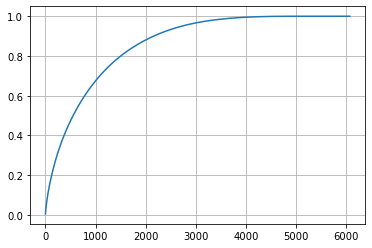

In [41]:


# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.grid()
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)



In [43]:


# How much variance we'd capture with 
cumulative_explained_variance[3000]#its better for big data use 300

0.9665165482805733

In [44]:


pca = PCA(n_components=3000)#300 is better for reail data

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape



(6072, 3000)

In [45]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC2951,PC2952,PC2953,PC2954,PC2955,PC2956,PC2957,PC2958,PC2959,PC2960,PC2961,PC2962,PC2963,PC2964,PC2965,PC2966,PC2967,PC2968,PC2969,PC2970,PC2971,PC2972,PC2973,PC2974,PC2975,PC2976,PC2977,PC2978,PC2979,PC2980,PC2981,PC2982,PC2983,PC2984,PC2985,PC2986,PC2987,PC2988,PC2989,PC2990,PC2991,PC2992,PC2993,PC2994,PC2995,PC2996,PC2997,PC2998,PC2999,PC3000
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,-2.600823,-0.228111,0.235687,0.013615,-0.018715,0.752971,0.394351,-0.891280,0.428882,-0.034197,-0.116814,0.212901,1.021281,0.510437,1.865479,-0.336868,-0.174949,-0.506946,0.019214,-0.509849,-1.915383,0.652170,-0.177774,0.933532,0.303334,-0.192966,1.731344,0.917650,-0.990478,0.199462,-1.115897,-0.079160,0.283178,0.328525,-0.160417,0.314445,-0.485277,-1.856802,2.065473,1.161342,-1.069048,-0.194812,0.803778,-0.325935,0.814022,-0.510616,1.567105,0.748740,0.808128,-1.576378,...,-0.114884,-0.026434,0.436332,0.129585,0.419513,-0.183465,0.430709,0.912680,0.636525,0.806537,-0.284387,0.227141,-0.372728,0.264434,0.082215,0.534300,-0.120510,-0.423070,0.718626,-0.638921,0.152470,-0.362126,0.994527,-0.247195,-0.190143,-0.416278,0.005374,0.215995,0.666351,0.394124,0.602834,-0.318347,0.533727,-0.187579,-0.587593,-0.589305,-0.060925,-0.429657,-0.263525,0.132494,-0.427446,-0.056886,0.001983,0.464387,0.056557,0.551744,-0.551503,-0.078357,0.199011,0.485994
43,17.586519,0.174065,-4.096298,6.121478,-2.770448,-0.884563,-4.062224,-0.152733,-0.364801,-1.777487,3.936905,2.015872,-1.850457,2.297419,-1.141087,0.758925,0.789049,-2.078040,0.270108,-0.673048,-1.048628,1.583610,3.544614,3.988042,-0.151927,-1.550729,-2.712068,1.773205,1.092726,-1.994056,-1.608051,-5.652190,2.347031,-2.776422,4.372152,-1.193012,-3.045910,-3.387286,-1.696716,-0.628539,1.841451,2.388508,4.191061,1.497137,-5.803195,-0.968268,-0.589492,0.987423,-2.018085,0.168171,...,0.188027,-0.179357,-0.193935,0.138916,0.074906,0.103376,-0.190206,0.028468,0.133785,-0.222775,-0.172121,-0.028476,0.062148,0.192555,0.104890,-0.047057,0.309622,0.188881,0.228202,0.072102,0.237303,-0.097765,-0.082944,-0.035672,0.091324,-0.217425,-0.132285,0.001032,-0.185685,-0.084529,-0.225663,0.221605,0.239926,0.038507,0.110609,-0.130030,-0.070169,-0.082327,-0.067233,0.040721,-0.170736,0.167497,-0.198182,-0.137073,-0.010439,-0.374095,-0.057376,-0.224118,0.130528,-0.395101
67,-2.181454,0.992549,-0.541735,-0.576170,0.399004,-0.833045,-0.982430,0.559043,0.088999,0.890679,0.376820,-0.309395,-1.554490,-0.292120,-1.971831,-0.296562,-0.256928,-0.240848,0.514212,0.329175,1.163014,0.155493,0.166253,0.040290,-0.967392,0.504316,0.832638,-0.413152,-0.001839,-0.285495,-0.505058,0.391614,-0.849807,-0.329019,-0.303175,-0.110007,0.329497,0.230387,-0.192493,-0.034211,0.370494,0.179423,-0.633976,0.567461,-0.236297,-0.179482,0.186598,-1.069382,-0.340330,0.327173,...,-3.901532,-2.164546,2.523158,0.871647,-0.102303,1.298064,1.092833,2.140476,2.163215,-0.108722,-1.660945,1.746781,1.116150,-2.529181,-1.620564,1.195929,-0.053533,-1.513868,2.243599,0.083229,1.315473,3.751107,0.327217,0.725495,-2.458866,-0.088797,-1.519668,0.102697,1.943263,0.398379,0.159823,1.497310,-2.199866,-1.596447,-0.128109,0.844162,1.220095,-2.270901,1.744499,-0.407686,-1.239644,1.144410,1.010876,-4.379102,-1.224497,-1.760138,-0.152819,-1.452924,-0.792565,-1.697494
88,1.917296,0.872535,-1.495554,-0.881902,0.791151,-0.784900,0.088462,-0.683086,-0.625861,1.781548,-0.516984,-0.332027,0.254250,-0.992377,-5.722030,5.559739,-0.666483,-0.996458,-0.810399,-0.353944,3.713099,0.535990,0.049872,0.066965,-1.659683,0.410547,-1.370703,-0.433513,1.248185,-0.555867,-1.493879,1.638361,-1.436843,1.309556,-0.762769,0.925765,0.439688,-0.126771,0.757996,1.121048,1.447691,1.120376,-1.310585,

In [46]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')

In [47]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)#, index_col='customer_code'

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv',index_col=0)#, index_col='customer_code'

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv',index_col=0)#, index_col=0 or'customer_code'

In [48]:
# Print shape of each dataframe
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )

(6072, 4)
(6072, 1000)
(6072, 3000)


In [49]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_products,total_unique_products,total_category,total_unique_category,1774,8038,73087,41779,60544,48724,35032,10633,43687,25807,31483,39904,4360,72973,74791,73486,53398,65698,27520,56446,79546,11473,42193,72877,73129,55864,75208,78415,92800,2308,60310,38335,20911,6787,79561,12916,73195,74002,76888,62383,80125,40432,80752,26017,65749,7210,...,60601,101437,42508,90157,42583,86605,86596,42574,90919,42580,85747,60547,96724,42481,86572,85735,42859,20707,102073,86602,92338,42553,86329,102067,89890,90913,86581,86593,89824,98911,42880,86599,42595,42604,86590,86587,89821,86584,91900,86608,42478,42475,85699,42571,89995,60595,42883,42532,42877,42862
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,34,33,18,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0
43,214,132,50,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,4,0,1,0,1,0,1,0,0,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,0,2,0,1,0,1,0,1,0,3,2,0,0,3,1,1,0,7,0
67,57,39,14,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,1,2,1,0,1,0,3,0,0,0,3,2,2,1
88,105,67,21,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,0,0,1,5,0,1,1,3,0,1,0,2,0,0,3,2,1,3,0,0,6,1,5,6,3
103,117,87,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,4,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,2,0,1,4,3,1,0,0,0,0,0,0,0,0,2,2,1,2,7,5,3


In [50]:
 #Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Display first 5 rows of pca_df
pca_df.head()

,total_products,total_unique_products,total_category,total_unique_category,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,...,PC2951,PC2952,PC2953,PC2954,PC2955,PC2956,PC2957,PC2958,PC2959,PC2960,PC2961,PC2962,PC2963,PC2964,PC2965,PC2966,PC2967,PC2968,PC2969,PC2970,PC2971,PC2972,PC2973,PC2974,PC2975,PC2976,PC2977,PC2978,PC2979,PC2980,PC2981,PC2982,PC2983,PC2984,PC2985,PC2986,PC2987,PC2988,PC2989,PC2990,PC2991,PC2992,PC2993,PC2994,PC2995,PC2996,PC2997,PC2998,PC2999,PC3000
customer_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,34,33,18,18,-2.600823,-0.228111,0.235687,0.013615,-0.018715,0.752971,0.394351,-0.891280,0.428882,-0.034197,-0.116814,0.212901,1.021281,0.510437,1.865479,-0.336868,-0.174949,-0.506946,0.019214,-0.509849,-1.915383,0.652170,-0.177774,0.933532,0.303334,-0.192966,1.731344,0.917650,-0.990478,0.199462,-1.115897,-0.079160,0.283178,0.328525,-0.160417,0.314445,-0.485277,-1.856802,2.065473,1.161342,-1.069048,-0.194812,0.803778,-0.325935,0.814022,-0.510616,...,-0.114884,-0.026434,0.436332,0.129585,0.419513,-0.183465,0.430709,0.912680,0.636525,0.806537,-0.284387,0.227141,-0.372728,0.264434,0.082215,0.534300,-0.120510,-0.423070,0.718626,-0.638921,0.152470,-0.362126,0.994527,-0.247195,-0.190143,-0.416278,0.005374,0.215995,0.666351,0.394124,0.602834,-0.318347,0.533727,-0.187579,-0.587593,-0.589305,-0.060925,-0.429657,-0.263525,0.132494,-0.427446,-0.056886,0.001983,0.464387,0.056557,0.551744,-0.551503,-0.078357,0.199011,0.485994
43,214,132,50,50,17.586519,0.174065,-4.096298,6.121478,-2.770448,-0.884563,-4.062224,-0.152733,-0.364801,-1.777487,3.936905,2.015872,-1.850457,2.297419,-1.141087,0.758925,0.789049,-2.078040,0.270108,-0.673048,-1.048628,1.583610,3.544614,3.988042,-0.151927,-1.550729,-2.712068,1.773205,1.092726,-1.994056,-1.608051,-5.652190,2.347031,-2.776422,4.372152,-1.193012,-3.045910,-3.387286,-1.696716,-0.628539,1.841451,2.388508,4.191061,1.497137,-5.803195,-0.968268,...,0.188027,-0.179357,-0.193935,0.138916,0.074906,0.103376,-0.190206,0.028468,0.133785,-0.222775,-0.172121,-0.028476,0.062148,0.192555,0.104890,-0.047057,0.309622,0.188881,0.228202,0.072102,0.237303,-0.097765,-0.082944,-0.035672,0.091324,-0.217425,-0.132285,0.001032,-0.185685,-0.084529,-0.225663,0.221605,0.239926,0.038507,0.110609,-0.130030,-0.070169,-0.082327,-0.067233,0.040721,-0.170736,0.167497,-0.198182,-0.137073,-0.010439,-0.374095,-0.057376,-0.224118,0.130528,-0.395101
67,57,39,14,14,-2.181454,0.992549,-0.541735,-0.576170,0.399004,-0.833045,-0.982430,0.559043,0.088999,0.890679,0.376820,-0.309395,-1.554490,-0.292120,-1.971831,-0.296562,-0.256928,-0.240848,0.514212,0.329175,1.163014,0.155493,0.166253,0.040290,-0.967392,0.504316,0.832638,-0.413152,-0.001839,-0.285495,-0.505058,0.391614,-0.849807,-0.329019,-0.303175,-0.110007,0.329497,0.230387,-0.192493,-0.034211,0.370494,0.179423,-0.633976,0.567461,-0.236297,-0.179482,...,-3.901532,-2.164546,2.523158,0.871647,-0.102303,1.298064,1.092833,2.140476,2.163215,-0.108722,-1.660945,1.746781,1.116150,-2.529181,-1.620564,1.195929,-0.053533,-1.513868,2.243599,0.083229,1.315473,3.751107,0.327217,0.725495,-2.458866,-0.088797,-1.519668,0.102697,1.943263,0.398379,0.159823,1.497310,-2.199866,-1.596447,-0.128109,0.844162,1.220095,-2.270901,1.744499,-0.407686,-1.239644,1.144410,1.010876,-4.379102,-1.224497,-1.760138,-0.152819,-1.452924,-0.792565,-1.697494
88,105,67,21,21,1.917296,0.872535,-1.495554,-0.881902,0.791151,-0.784900,0.088462,-0.683086,-0.625861,1.781548,-0.516984,-0.332027,0.254250,-0.992377,-5.722030,5.559739,-0.666483,-0.996458,-0.810399,-0.353944,3.713099,0.535990,0.049872,0.066965,-1.659683,0.410547,-1.370703,-0.433513,1.248185,-0.555867,-1.493879,1.638361,-1.436843,1.309556,-0.762769,0.925765,0.439688,-0.126771,0.757996,1.121048,1.447691,1.120376,-1.310585,-0.60366

In [51]:


# Initialize instance of StandardScaler
t_scaler = StandardScaler()
p_scaler = StandardScaler()

# Fit and transform
threshold_df_scaled = t_scaler.fit_transform(threshold_df)
pca_df_scaled = p_scaler.fit_transform(pca_df)



In [52]:
t_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [53]:
t_kmeans.fit(threshold_df_scaled)
threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled)

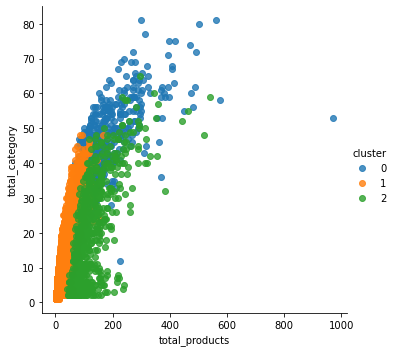

In [54]:


# Scatterplot, colored by cluster
sns.lmplot(x='total_products', y='total_category', hue='cluster', data=threshold_df, fit_reg=False)



In [75]:
t_kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1])

In [132]:
result = np.where(df['customer_code'] == 115)
print(result)

(array([     0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,     13,     14,     15,
           16,     17,     18,     19,  13831,  13832,  13833,  13834,
        13835,  13836,  13837,  13838,  13839,  13840,  13841,  13842,
        13843,  21186,  21187,  21188,  21189,  21190,  21191,  21192,
        21193,  76684,  76685,  76686,  76687,  76688,  76689,  76690,
        89948,  89949,  89950,  89951,  89952,  89953,  89954,  89955,
        89956,  89957,  89958,  89959, 103328, 103329, 103330, 103331,
       103332, 167703, 167704, 167705, 167706, 167707, 167708, 167709,
       167710, 216752, 216753, 216754, 216755, 216756, 216757, 216758,
       216759, 216760, 223355, 223356, 223357, 223358, 223359, 223360,
       223361, 223362, 223363, 223364, 223365, 223366, 223367, 223368,
       223369, 223370, 223371, 223372, 223373, 262835, 262836, 262837,
       262838, 262839, 262840, 262841, 262842, 262843, 262844, 262845,
     